In [2]:
import sklearn; 
print(sklearn.__version__)

0.19.1


In [3]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

### Question 1

In [3]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'data', 'regression_part1.csv')
student_data = pd.read_csv(data_path, delimiter = ',')

In [4]:
student_data.head(5)

,revision_time,exam_score
0,2.723,27.682
1,2.844,22.998
2,3.303,19.765
3,3.588,24.481
4,4.050,22.974


In [5]:
student_data.tail()

,revision_time,exam_score
45,45.213,76.957
46,45.397,78.698
47,46.923,90.384
48,47.818,94.945
49,48.011,86.968


In [6]:
student_data.describe()

,revision_time,exam_score
count,50.000000,50.000000
mean,22.220020,49.919860
std,13.986112,20.925594
min,2.723000,14.731000
25%,8.570500,32.125000
50%,21.688000,47.830500
75%,32.257500,65.069750
max,48.011000,94.945000


In [7]:
len(student_data)

50

In [8]:
X = student_data.drop(columns="exam_score")
Phi = np.c_[np.ones((len(X), 1)), X]
y = student_data["exam_score"]

In [9]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression(fit_intercept=False)
lreg.fit(Phi, y)
lreg.coef_

array([17.89768026,  1.44114091])

In [10]:
print(17.8977 + 10*1.4411)
lreg.predict(np.array([1, 10]).reshape(1,-1))

32.3087


array([32.30908931])

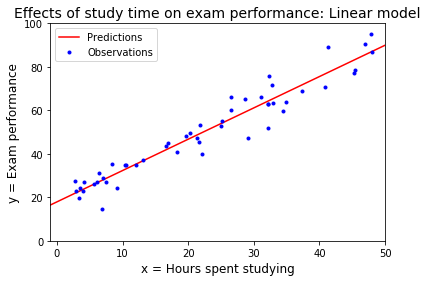

In [11]:
X_coords = np.linspace(-1, 50)
Phi_coords = np.c_[np.ones((len(X_coords), 1)), X_coords]
pred, = plt.plot(X_coords, lreg.predict(Phi_coords), "r-")
obs, = plt.plot(X, y, "b.")
obs.set_label("Observations")
pred.set_label("Predictions")
plt.legend()
plt.axis([-1, 50, 0, 100])
plt.xlabel("x = Hours spent studying", fontsize=12)
plt.ylabel("y = Exam performance", fontsize=12)
plt.title("Effects of study time on exam performance: Linear model", fontsize=14)
plt.show()

In [12]:
# Phi is our nx2 design matrix, y our nx1 target vector
gramian_matrix_of_phi = np.dot(Phi.T, Phi)
inverse_of_gramian    = np.linalg.inv(gramian_matrix_of_phi)
pseudo_inverse_of_phi = np.dot(inverse_of_gramian, Phi.T)
estimated_w           = np.dot(pseudo_inverse_of_phi, y)

estimated_w

array([17.89768026,  1.44114091])

In [13]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y, lreg.predict(Phi))

30.9854726145413

In [14]:
def mse(Phi, weights):
    squared_error_sum = 0
    for i in range(len(Phi)):
        yi_pred = sum(Phi[i] * weights)
        squared_error_sum += (yi_pred - y[i])**2
    return 1/len(Phi) * squared_error_sum
mse(Phi,estimated_w)

30.985472614541287

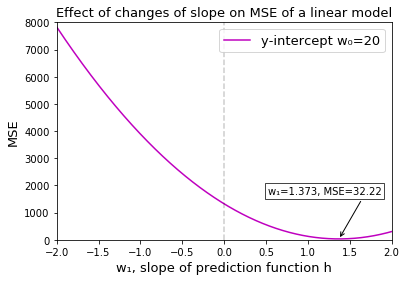

1.3726745349069813
32.221645705804


In [15]:
w0 = 20
w1 = np.linspace(-2, 2, 5000)
error, = plt.plot(w1, [mse(Phi, [w0, w1[i]]) for i in range(5000)], "m-")
error.set_label("y-intercept w\N{SUBSCRIPT ZERO}=20")
plt.plot([0, 0], [0, 8000], "k--", alpha=0.2)
plt.axis([-2, 2, 0, 8000])
plt.xlabel("w\N{SUBSCRIPT ONE}, slope of prediction function h", fontsize=13)
plt.ylabel("MSE", fontsize=13)
plt.title("Effect of changes of slope on MSE of a linear model", fontsize=13)
plt.legend(fontsize=13)

def annot_min(x,y, ax=None):
    xmin = x[np.argmin(y)]
    ymin = min(y)
    text= "w\N{SUBSCRIPT ONE}={:.3f}, MSE={:.2f}".format(xmin, ymin)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="center", va="bottom")
    ax.annotate(text, xy=(xmin, ymin), xytext=(0.8,0.2), **kw)

annot_min(w1,[mse(Phi, [w0, w1[i]]) for i in range(5000)])

plt.show()
print(w1[np.argmin([mse(Phi, [w0, w1[i]]) for i in range(5000)])])
print(min([mse(Phi, [w0, w1[i]]) for i in range(5000)]))

### Question 2

In [16]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'data', 'regression_part2.csv')
reg_data = pd.read_csv(data_path, delimiter = ',')

In [17]:
reg_data.head(5)

,input,output
0,2.728,9.088
1,3.244,12.786
2,-4.164,-10.016
3,4.875,32.976
4,3.329,10.437


In [18]:
reg_data.describe()

,input,output
count,25.000000,25.00000
mean,0.817480,5.90728
std,3.277051,12.43568
min,-4.826000,-15.57700
25%,-2.588000,-1.46500
50%,2.633000,6.92900
75%,3.276000,11.38200
max,4.875000,32.97600


In [19]:
X = reg_data.drop(columns=["output"])
y = reg_data["output"]

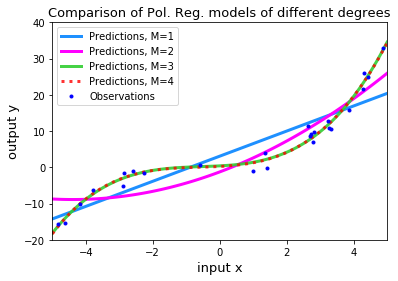

In [20]:
from sklearn.preprocessing import PolynomialFeatures 

models = []
Phi_polys = []
colours = ["dodgerblue", "fuchsia", "limegreen", "r"] 
alphas = [1, 1, 0.9, 0.8]

for M in range(1,5):
    poly_features = PolynomialFeatures(degree=M, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    Phi_poly = np.c_[np.ones((len(X_poly), 1)), X_poly]
    Phi_polys.append(Phi_poly)
    
    lin_reg = LinearRegression(fit_intercept=False)
    lin_reg.fit(Phi_poly, y)
    models.append(lin_reg)
    
    X_coords = np.linspace(-5, 5, 100)
    X_coords_poly = poly_features.transform(np.array(X_coords).reshape(-1, 1))
    Phi_coords_poly = np.c_[np.ones((len(X_coords_poly), 1)), X_coords_poly]
    y_predict = lin_reg.predict(Phi_coords_poly)
    
    if (M != 4):
        pred, = plt.plot(X_coords, y_predict, colours[M-1], alpha=alphas[M-1])
    else:
        pred, = plt.plot(X_coords, y_predict, "r:", alpha=alphas[M-1])
        
    pred.set_label("Predictions, M=" + str(M))
    
obs, = plt.plot(X, y, "b.")
obs.set_label("Observations")
leg = plt.legend()
for line in leg.get_lines():
    line.set_linewidth(3.)
plt.axis([-5, 5, -20, 40])
plt.xlabel("input x", fontsize=13)
plt.ylabel("output y", fontsize=13)
plt.title("Comparison of Pol. Reg. models of different degrees", fontsize=13)
for line in plt.gca().lines:
    line.set_linewidth(3.)
plt.show()

In [21]:
errors = [mean_squared_error(y, models[i].predict(Phi_polys[i])) for i in range(len(models))]
errors

[24.744378032672856,
 17.352926937873296,
 2.7447567192524276,
 2.7389111790755383]

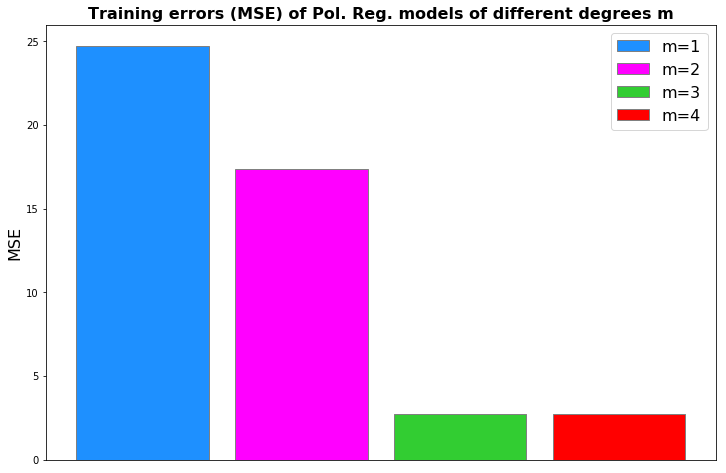

In [22]:
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
   
# set height of bar 
heights = [[error] for error in errors]
   
# Set position of bar on X axis 
brs = [0, 0.3, 0.6, 0.9]
   
# Make the plot 
for i in range(len(models)):
    plt.bar(brs[i], heights[i], color =colours[i], width = barWidth, 
        edgecolor ='grey', label ="m=" + str(i+1)) 
    
plt.ylabel('MSE', fontsize=16) 
plt.xticks([]) 
plt.legend(prop={'size': 16})
plt.title("Training errors (MSE) of Pol. Reg. models of different degrees m", fontsize=16, fontweight="bold")
plt.show() 

In [23]:
def single_rbf(x, c, alpha):
    return np.exp((-1/2) * (x-c)**2 / alpha**2)

def group_rbf(x, alpha):
    return [1, single_rbf(x, -4.0, alpha), single_rbf(x, -2.0, alpha),
            single_rbf(x, 2.0, alpha), single_rbf(x, 4.0, alpha)]

[1, 8.58716646651046e-90, 1.495289916360948e-23, 2.334166753175526e-21, 2.0924872986388428e-85]

[1, 0.999180006820097, 0.9997897935483654, 0.9998099915259917, 0.9992203785450484]

[1, 0.9999917967380648, 0.9999978977167288, 0.9999980997365264, 0.9999922007752361]



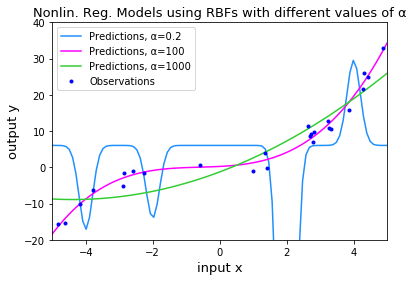

In [24]:
alphas = [0.2, 100, 1000]
models = []

for i in range(len(alphas)):
    alpha = alphas[i]
    X_rbf = [group_rbf(x, alpha) for x in X.values]
    lin_reg = LinearRegression(fit_intercept=False)
    lin_reg.fit(X_rbf, y)
    models.append(lin_reg)
    
    X_coords = np.linspace(-5, 5, 100)
    X_coords_rbf = [group_rbf(x, alpha) for x in X_coords]
    y_predict = lin_reg.predict(X_coords_rbf)
    
    print(X_coords_rbf[50])
    print()
    
    pred, = plt.plot(X_coords, y_predict, colours[i])
    pred.set_label("Predictions, \N{GREEK SMALL LETTER ALPHA}=" + str(alpha))
obs, = plt.plot(X, y, "b.")
obs.set_label("Observations")
plt.legend()
plt.axis([-5, 5, -20, 40])
plt.xlabel("input x", fontsize=13)
plt.ylabel("output y", fontsize=13)
plt.title("Nonlin. Reg. Models using RBFs with different values of \N{GREEK SMALL LETTER ALPHA}", fontsize=13)
plt.show()

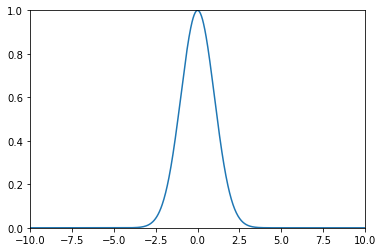

In [27]:
xs = np.linspace(-10, 10, 1000)
ys = [single_rbf(x, 0, 1) for x in xs]
plt.axis([-10, 10, 0, 1])
plt.plot(xs, ys)

### Question 3

In [28]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'data', 'faces_train_data.csv')
faces_train = pd.read_csv(data_path, delimiter = ',')
data_path = os.path.join(os.getcwd(), 'data', 'faces_test_data.csv')
faces_test = pd.read_csv(data_path, delimiter = ',')

In [29]:
faces_train.head(5)

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y63,x64,y64,x65,y65,x66,y66,x67,y67,smiling
0,-1.861,1.350,-1.835,0.892,-1.756,0.458,-1.704,-0.000,-1.625,-0.458,...,-0.160,0.498,-0.343,0.183,-0.389,-0.026,-0.389,-0.210,-0.389,0
1,-1.920,1.523,-1.920,1.066,-1.833,0.571,-1.746,0.076,-1.571,-0.343,...,-0.076,0.742,-0.076,0.262,-0.267,0.000,-0.305,-0.262,-0.267,1
2,-1.247,1.177,-1.256,0.806,-1.183,0.403,-0.983,0.008,-0.746,-0.371,...,-0.055,1.247,0.016,0.464,-0.506,0.173,-0.553,-0.082,-0.537,1
3,-1.660,1.812,-1.701,1.324,-1.660,0.801,-1.620,0.314,-1.498,-0.139,...,-0.070,0.891,-0.035,0.283,-0.279,0.000,-0.279,-0.283,-0.244,0
4,-1.776,1.551,-1.693,1.140,-1.549,0.729,-1.363,0.318,-1.115,-0.075,...,-0.093,0.764,0.056,0.227,-0.112,0.041,-0.150,-0.145,-0.131,0


In [35]:
faces_train.describe()

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y63,x64,y64,x65,y65,x66,y66,x67,y67,smiling
count,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,...,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000
mean,-1.931962,1.455752,-1.920338,1.004314,-1.858298,0.545549,-1.744761,0.089065,-1.550913,-0.333587,...,-0.111277,0.687324,-0.106768,0.223960,-0.263222,0.005834,-0.288294,-0.211278,-0.269045,0.486458
std,0.590181,0.402155,0.552056,0.380052,0.532371,0.361070,0.523245,0.343751,0.491355,0.321495,...,0.050815,0.209837,0.148709,0.086788,0.148332,0.073380,0.147636,0.083300,0.148305,0.499869
min,-3.979000,-2.111000,-3.872000,-2.054000,-3.737000,-1.940000,-3.468000,-2.180000,-3.071000,-2.345000,...,-0.319000,-0.441000,-0.897000,-0.448000,-1.142000,-0.597000,-1.162000,-0.746000,-1.154000,0.000000
25%,-2.241000,1.247750,-2.204000,0.812750,-2.142250,0.361750,-2.039250,-0.086000,-1.839000,-0.505000,...,-0.142000,0.582000,-0.191000,0.188000,-0.356000,-0.024000,-0.383000,-0.252000,-0.361000,0.000000
50%,-1.952000,1.456000,-1.931000,1.011000,-1.854000,0.561000,-1.751000,0.104000,-1.576500,-0.319000,...,-0.110000,0.701000,-0.102000,0.224000,-0.242000,0.000000,-0.266000,-0.213000,-0.247000,0.000000
75%,-1.628750,1.676000,-1.626000,1.212250,-1.557750,0.750000,-1.451000,0.285250,-1.276000,-0.141000,...,-0.078000,0.823250,-0.018000,0.266000,-0.147000,0.035250,-0.169000,-0.175000,-0.152000,1.000000
max,1.984000,3.461000,1.617000,3.132000,1.213000,2.747000,0.808000,2.473000,0.655000,2.296000,...,0.288000,1.387000,0.725000,0.725000,0.336000,0.544000,0.144000,0.369000,0.318000,1.000000


In [31]:
faces_test.describe()

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y63,x64,y64,x65,y65,x66,y66,x67,y67,smiling
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,-1.924105,1.466505,-1.913906,1.015347,-1.854442,0.556578,-1.742358,0.100410,-1.549113,-0.322024,...,-0.109595,0.686934,-0.101417,0.221621,-0.256826,0.004443,-0.281469,-0.211166,-0.262411,0.493333
std,0.586384,0.412054,0.548511,0.389851,0.529543,0.368793,0.524712,0.348176,0.498277,0.322613,...,0.049170,0.202535,0.147125,0.082986,0.141866,0.073667,0.139187,0.087036,0.137586,0.500164
min,-3.846000,-2.116000,-3.673000,-2.341000,-3.487000,-2.539000,-3.287000,-2.624000,-3.005000,-2.511000,...,-0.280000,-0.133000,-0.672000,-0.282000,-1.087000,-0.507000,-1.109000,-0.732000,-1.087000,0.000000
25%,-2.250000,1.243000,-2.220250,0.816000,-2.150000,0.364000,-2.049000,-0.092250,-1.843000,-0.502250,...,-0.138000,0.580000,-0.180000,0.185750,-0.347000,-0.027000,-0.374000,-0.254000,-0.353000,0.000000
50%,-1.949000,1.465000,-1.921000,1.016000,-1.860500,0.562500,-1.758500,0.105500,-1.582500,-0.316500,...,-0.108000,0.704000,-0.097500,0.225000,-0.240000,0.000000,-0.263000,-0.213000,-0.244000,0.000000
75%,-1.626250,1.686500,-1.627750,1.221500,-1.562750,0.753500,-1.448500,0.302000,-1.282000,-0.128500,...,-0.078000,0.816000,-0.000000,0.264000,-0.142000,0.036000,-0.166000,-0.175000,-0.155000,1.000000
max,1.613000,3.641000,1.067000,3.205000,0.522000,2.718000,0.000000,2.510000,0.309000,2.213000,...,0.248000,1.269000,0.702000,0.603000,0.248000,0.411000,0.041000,0.259000,0.168000,1.000000


In [32]:
X_train = faces_train.drop(columns=["smiling"])
y_train = faces_train["smiling"]
X_test = faces_test.drop(columns=["smiling"])
y_test = faces_test["smiling"]

In [33]:
smilers = X_train[y_train == 1]
frowners = X_train[y_train == 0]

In [37]:
len(X_test[y_test == 1])/len(X_test)

0.49333333333333335

In [38]:
smiler_x_cols = [smilers["x" + str(i)] for i in range(68)]
smiler_x_means = [col.mean() for col in smiler_x_cols]
smiler_y_cols = [smilers["y" + str(i)] for i in range(68)]
smiler_y_means = [col.mean() for col in smiler_y_cols]

frowner_x_cols = [frowners["x" + str(i)] for i in range(68)]
frowner_x_means = [col.mean() for col in frowner_x_cols]
frowner_y_cols = [frowners["y" + str(i)] for i in range(68)]
frowner_y_means = [col.mean() for col in frowner_y_cols]

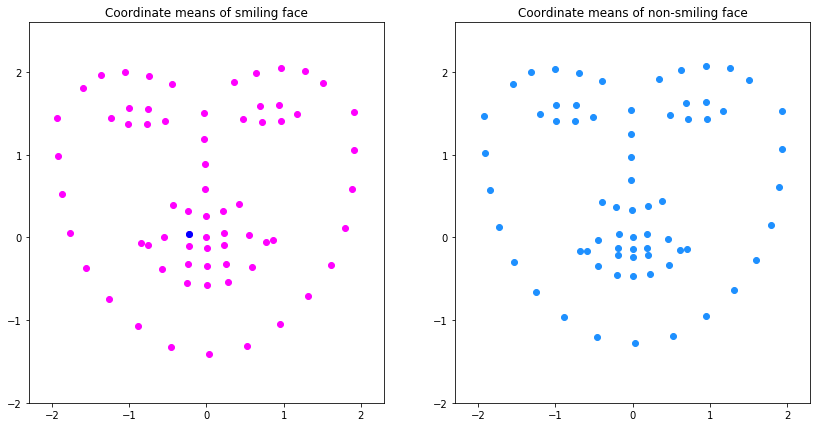

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

ax[0].scatter(smiler_x_means, smiler_y_means, c="fuchsia")
ax[0].axis([-2.3, 2.3, -2, 2.6])
ax[0].title.set_text("Coordinate means of smiling face")

ax[0].scatter(smiler_x_means[50], smiler_y_means[50], c="b")
#ax[0].scatter(smiler_x_means[48], smiler_y_means[48], c="b")
#ax[0].scatter(smiler_x_means[29], smiler_y_means[29], c="b")

ax[1].scatter(frowner_x_means, frowner_y_means, c="dodgerblue")
ax[1].axis([-2.3, 2.3, -2, 2.6])
ax[1].title.set_text("Coordinate means of non-smiling face")


plt.show()

In [43]:
from sklearn.tree import DecisionTreeClassifier

tree_reg = DecisionTreeClassifier(max_depth=8, random_state=2001)
tree_reg.fit(X_train, y_train)

print(accuracy_score(y_train, tree_reg.predict(X_train)))
print(accuracy_score(y_test, tree_reg.predict(X_test)))
tree_reg.max_depth

0.9335416666666667
0.8408333333333333


8

In [44]:
imps = tree_reg.feature_importances_
(-imps).argsort()

array([100,  97,  59, 106,  98,  15,  17, 120, 129, 128,  65, 107, 125,
       108,   3,  77,   6, 109, 121, 104,  37,  19,  10,  61,  91,  49,
       131,   2, 135, 122,  99,  72, 110,  25,  45, 115,  29,  34,  63,
       123,  90,  28,  40, 127,  85,   1, 133,  43,  53,  67,  79,  57,
        69, 117,  87,   4,  23,  36, 132,  64,  82,  46,  44, 118, 105,
        21,  20,  22,  50,  26, 103, 102, 101,  27,  30,  24, 111, 116,
       113,   5, 130,   7,   8,   9, 126,  11, 112, 124,  13,  14,  16,
       119,  31,  18, 114,  12,  32,  92,  95,  70,  68, 134,  66,  41,
        42,  62,  60,  58,  56,  55,  54,  47,  52,  51,  71,  39,  73,
        74,  94,  93,  48,  33,  35,  89,  88,  96,  86,  83,  81,  80,
        78,  38,  76,  75,  84,   0], dtype=int64)

In [45]:
X_train.columns[100]

'x50'

In [46]:
print(smiler_x_means[50], smiler_y_means[50])

-0.22101241970021418 0.039740471092077095


In [47]:
X_train.columns[97]

'y48'

In [48]:
print(smiler_x_means[48], smiler_y_means[48])

-0.8539713062098501 -0.06510620985010707


In [49]:
X_train.columns[59]

'y29'

In [50]:
print(smiler_x_means[29], smiler_y_means[29])

-0.0251627408993576 0.8876334047109207


In [51]:
imps[100]

0.33040484928175073

### Question 4

In [54]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'data', 'classification_eval_1.csv')
alg_data = pd.read_csv(data_path, delimiter = ',')

In [55]:
alg_data.head(5)

,gt,alg_1,alg_2,alg_3,alg_4
0,0,0.051302,0.000000,0.821882,0.705028
1,0,0.695441,1.000000,1.000000,0.741789
2,1,0.471121,0.913034,0.000000,1.000000
3,1,1.000000,1.000000,0.000000,1.000000
4,0,0.857339,0.000000,0.296797,0.809736


In [56]:
alg_data.describe()

,gt,alg_1,alg_2,alg_3,alg_4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.202000,0.493739,0.518386,0.491591,0.743101
std,0.401693,0.383203,0.426419,0.304036,0.194130
min,0.000000,0.000000,0.000000,0.000000,0.167336
25%,0.000000,0.074081,0.000000,0.248341,0.597597
50%,0.000000,0.498969,0.549211,0.476655,0.760082
75%,0.000000,0.887967,1.000000,0.732685,0.919085
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
y = alg_data["gt"]
alg_1 = alg_data["alg_1"]
alg_2 = alg_data["alg_2"]
alg_3 = alg_data["alg_3"]
alg_4 = alg_data["alg_4"]
alg_1_bin = [int(x >= 0.5) for x in alg_1]
alg_2_bin = [int(x >= 0.5) for x in alg_2]
alg_3_bin = [int(x >= 0.5) for x in alg_3]
alg_4_bin = [int(x >= 0.5) for x in alg_4]

In [58]:
len(y[y > 0])

202

In [59]:
print(accuracy_score(y, alg_1_bin))
print(accuracy_score(y, alg_2_bin))
print(accuracy_score(y, alg_3_bin))
print(accuracy_score(y, alg_4_bin))

0.616
0.55
0.321
0.329


In [60]:
from sklearn.metrics import roc_curve

fpr_1, tpr_1, thresholds_1 = roc_curve(y, alg_1)
fpr_2, tpr_2, thresholds_2 = roc_curve(y, alg_2)
fpr_3, tpr_3, thresholds_3 = roc_curve(y, alg_3)
fpr_4, tpr_4, thresholds_4 = roc_curve(y, alg_4)

In [61]:
from sklearn.metrics import roc_auc_score

ras_1 = roc_auc_score(y, alg_1)
ras_2 = roc_auc_score(y, alg_2)
ras_3 = roc_auc_score(y, alg_3)
ras_4 = roc_auc_score(y, alg_4)

print(ras_1)
print(ras_2)
print(ras_3)
print(ras_4)

0.7320932281198045
0.6316285763914737
0.06395009801732053
0.8473876522990644


In [62]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y, alg_1_bin))
print(precision_score(y, alg_2_bin))
print(precision_score(y, alg_3_bin))
print(precision_score(y, alg_4_bin))

0.318
0.2633587786259542
0.0
0.2313860252004582


In [63]:
print(recall_score(y, alg_1_bin))
print(recall_score(y, alg_2_bin))
print(recall_score(y, alg_3_bin))
print(recall_score(y, alg_4_bin))

0.7871287128712872
0.6831683168316832
0.0
1.0


In [64]:
def plot_roc_curve(fpr, tpr, colour="r", label=None):
    plt.plot(fpr, tpr, colour, linewidth=2, label=label)
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate", fontsize=13)
    plt.ylabel("True Positive Rate (Recall)", fontsize=13)
    
    plt.grid()

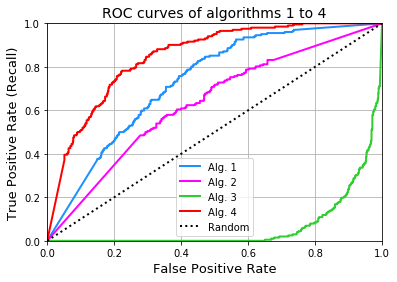

In [65]:
plot_roc_curve(fpr_1, tpr_1, colours[0], label="Alg. 1")
plot_roc_curve(fpr_2, tpr_2, colours[1], label="Alg. 2")
plot_roc_curve(fpr_3, tpr_3, colours[2], label="Alg. 3")
plot_roc_curve(fpr_4, tpr_4, colours[3], label="Alg. 4")
plot_roc_curve(np.linspace(0, 1, 100), np.linspace(0,1,100), "k:", label = "Random")
plt.legend()
plt.title("ROC curves of algorithms 1 to 4", fontsize=14)
plt.show()

0.9360499019826796


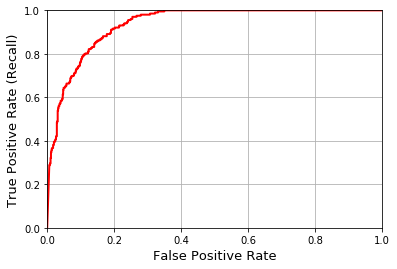

In [66]:
alg_3_inv = [1-x for x in alg_3]
ras_3_inv = roc_auc_score(y, alg_3_inv)
print(ras_3_inv)
fpr_3_inv, tpr_3_inv, thresholds_3_inv = roc_curve(y, alg_3_inv)
plot_roc_curve(fpr_3_inv, tpr_3_inv, label="Alg. 3 inv")